# Neural Networks Are a Good Choice using frameworks like TensorFlow/Keras or PyTorch

💠**Large and Complex Data**: Neural networks excel at capturing complex patterns and nonlinear relationships.

💠**High Dimensionality**: If the dataset has many features, neural networks can effectively model intricate interactions.

💠**Enough Data**: Neural networks require a substantial amount of data for training. If the dataset is small, traditional models might perform better.

💠**Nonlinearit**y: Loan interest rates or amounts are often influenced by nonlinear factors (e.g., borrower income, loan intent, previous defaults). Neural networks can model these relationships better than linear models.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Step 1: Load and preprocess the data
loan_data = pd.read_csv("/content/loan_data.csv")  # Replace with your dataset path
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
loan_data.columns.value_counts()

,count
person_age,1
person_gender,1
person_education,1
person_income,1
person_emp_exp,1
person_home_ownership,1
loan_amnt,1
loan_intent,1
loan_int_rate,1
loan_percent_income,1


In [ ]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
# Encode Categorical Columns (if not already encoded).

# convert categorical data into Numerical data before scaling
loan_data.replace({
                    'person_gender':{'female':0, 'male':1},
                    'person_education':{'High School':0, 'Bachelor':1,'Associate':2,'Master':3, 'Doctorate':4},
                    'person_home_ownership':{'RENT':0, 'MORTGAGE': 1, 'OWN':2, 'OTHER':3},
                    'loan_intent':{'No':0, 'Yes':1},
                    'previous_loan_defaults_on_file': {'No':0, 'Yes':1},
                    'loan_intent': {'EDUCATION':0,'MEDICAL':1, 'VENTURE':2, 'PERSONAL':3, 'DEBTCONSOLIDATION': 4,
                                        'HOMEIMPROVEMENT': 5 }},inplace=True)

<ipython-input-4-0b7c28009bc7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({


In [ ]:
# Define features (X) and target (y)

feature_column = ['person_age','person_gender','person_education','person_income','person_emp_exp',
'person_home_ownership'	,'loan_intent','loan_int_rate','loan_percent_income','cb_person_cred_hist_length',
'credit_score',	'previous_loan_defaults_on_file']

target_column = 'loan_amnt'   # Target variable: loan_amnt or loan_int_rate

X = loan_data[feature_column] # feature columns
y = loan_data[target_column]  # target_column

print(X.shape, y.shape)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

(45000, 12) (45000,)
[[-0.95353824 -1.11006918  1.53365241 ... -0.73910854 -1.41981408
  -1.01603973]
 [-1.11896309 -1.11006918 -1.25965955 ... -0.99686317 -2.5499748
   0.98421348]
 [-0.45726369 -1.11006918 -1.25965955 ... -0.73910854  0.04741211
  -1.01603973]
 ...
 [ 0.8661351   0.90084476  0.60254843 ...  1.06517387  0.70171569
  -1.01603973]
 [ 0.2044357   0.90084476 -0.32855556 ...  0.03415535 -0.5672367
  -1.01603973]
 [-0.62268854  0.90084476 -1.25965955 ... -0.73910854 -0.09137955
  -1.01603973]]


In [ ]:
# Convert back to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,-0.953538,-1.110069,1.533652,-0.104090,-0.892284,-0.875636,0.480527,1.683039,4.016394,-0.739109,-1.419814,-1.016040
1,-1.118963,-1.110069,-1.259660,-0.846005,-0.892284,2.309524,-1.338478,0.044782,-0.684829,-0.996863,-2.549975,0.984213
2,-0.457264,-1.110069,-1.259660,-0.844065,-0.397517,0.716944,-0.732143,0.625557,3.443074,-0.739109,0.047412,-1.016040
3,-0.788113,-1.110069,-0.328556,-0.007039,-0.892284,-0.875636,-0.732143,1.417829,3.443074,-0.996863,0.840507,-1.016040
4,-0.622689,0.900845,1.533652,-0.176371,-0.727362,-0.875636,-0.732143,1.095549,4.475050,-0.481354,-0.924130,-1.016040
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,0.900845,0.602548,-0.402231,0.097249,-0.875636,-0.732143,1.562184,1.952442,-0.739109,0.245686,-1.016040
44996,1.527834,-1.110069,0.602548,-0.180537,1.911393,-0.875636,1.693197,1.028407,0.003155,1.322928,-0.230171,-1.016040
44997,0.866135,0.900845,0.602548,-0.290681,0.262171,-0.875636,1.086862,-0.331212,-1.028821,1.065174,0.701716,-1.016040
44998,0.204436,0.900845,-0.328556,-0.586348,-0.232595,-0.875636,-1.338478,0.746412,2.525762,0.034155,-0.567237,-1.016040


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape )
print(y_train.shape, y_test.shape)

(36000, 12) (9000, 12)
(36000,) (9000,)


In [ ]:
# Step 3: Build the Neural Network model
model = Sequential()

# Input layer + hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer 1
model.add(Dense(32, activation='relu'))  # Hidden layer 2
model.add(Dense(16, activation='relu'))  # Hidden layer 3
model.add(Dense(8, activation='relu'))  # Hidden layer 4


# Output layer
model.add(Dense(1))  # Linear activation for regression tasks

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Loss: Mean Squared Error


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 77348104.0000 - mae: 6452.4648 - val_loss: 25483006.0000 - val_mae: 3187.4131
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22069218.0000 - mae: 3102.3357 - val_loss: 21851594.0000 - val_mae: 2996.9180
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19216692.0000 - mae: 2895.4644 - val_loss: 17945044.0000 - val_mae: 2560.1028
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13466953.0000 - mae: 2332.9453 - val_loss: 11798469.0000 - val_mae: 1943.6509
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7467215.5000 - mae: 1690.3749 - val_loss: 9007511.0000 - val_mae: 1722.0658
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5426559.0000 - mae: 1322.1843 - val_loss: 4711515.0000 - val_mae: 1077.5225
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3536348.5000 - mae: 1018.6925 - val_loss: 3379877.0000 - val_mae: 932.8388
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Neural Network Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Performance:
Mean Absolute Error (MAE): 286.14498978000216
Root Mean Squared Error (RMSE): 418.20258392798553
R-squared (R²): 0.9956549346378661


In [ ]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Evaluate on Training Data
y_train_pred = model.predict(X_train) # Predictions for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Print metrics in the desired format
print("Neural Network Training Performance:")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")  # Format MAE to 2 decimal places
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}") # Format RMSE to 2 decimal places
print(f"R-squared (R²): {train_r2:.2f}")  # Format R² to 2 decimal places

print("\nNeural Network Testing Performance:")  # Add a newline for separation
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network Training Performance:
Mean Absolute Error (MAE): 280.28
Root Mean Squared Error (RMSE): 395.97
R-squared (R²): 1.00

Neural Network Testing Performance:
Mean Absolute Error (MAE): 286.14
Root Mean Squared Error (RMSE): 418.20
R-squared (R²): 1.00


In [ ]:
print(feature_column)

['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


# Hear the example of the Predict the Loan_amount based on this feature variables,

In [ ]:
# Example input features
input_data = {
    'person_age': 22,  # Age of the person in years
    'person_gender': 0,  # 0 for Male, 1 for Female
    'person_education': 3,  # Education level (0: High School, 1: Bachelor, 2: Master, 3: Doctorate)
    'person_income': 71948.0,  # Annual income of the person in dollars
    'person_emp_exp': 0,      # Employment experience in years
    'person_home_ownership': 0,  # 0 for RENT, 1 for OWN, 2 for MORTGAGE
    'loan_intent': 3,        # Loan purpose (0: DEBTCONSOLIDATION, 1: CREDITCARD, 2: HOMEIMPROVEMENT, 3: PERSONAL, 4: MEDICAL, 5: EDUCATION)
    'loan_int_rate': 16.02,     # Interest rate for the loan in percentage
    'loan_percent_income': 0.49,   # Loan amount as a percentage of income
    'cb_person_cred_hist_length': 3.0,  # Credit bureau history length in years
    'credit_score': 561,         # Credit score of the person
    'previous_loan_defaults_on_file': 0  # 0 for No previous defaults, 1 for Yes
}

In [ ]:
import numpy as np

# Convert input data to a format compatible with the model
input_features = np.array([[22, 0, 3, 71948.0, 0, 0, 3, 16.02, 0.49, 3.0, 561, 0]])
# Standardize the input features (using the same scaler used during training)
input_features_scaled = scaler.transform(input_features)

# Predict loan amount using the trained neural network model
predicted_loan_amount = model.predict(input_features_scaled)

print(f"Predicted Loan Amount: {predicted_loan_amount[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Loan Amount: 35153.86


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Compare predicted vs actual


results = pd.DataFrame({
    'Actual': y_test.values.flatten(), # Use .values to access the NumPy array
    'Predicted': y_pred.flatten()
})

print(results.head(5))
print(results.tail(5))


    Actual     Predicted
0   7500.0   7611.267090
1   9000.0   9080.666992
2   5000.0   4965.624512
3   5000.0   5282.348145
4  10000.0  10349.685547
       Actual     Predicted
8995  14000.0  14878.857422
8996   6725.0   6704.103027
8997  14000.0  14517.386719
8998   8000.0   8031.471191
8999   8500.0   8278.339844


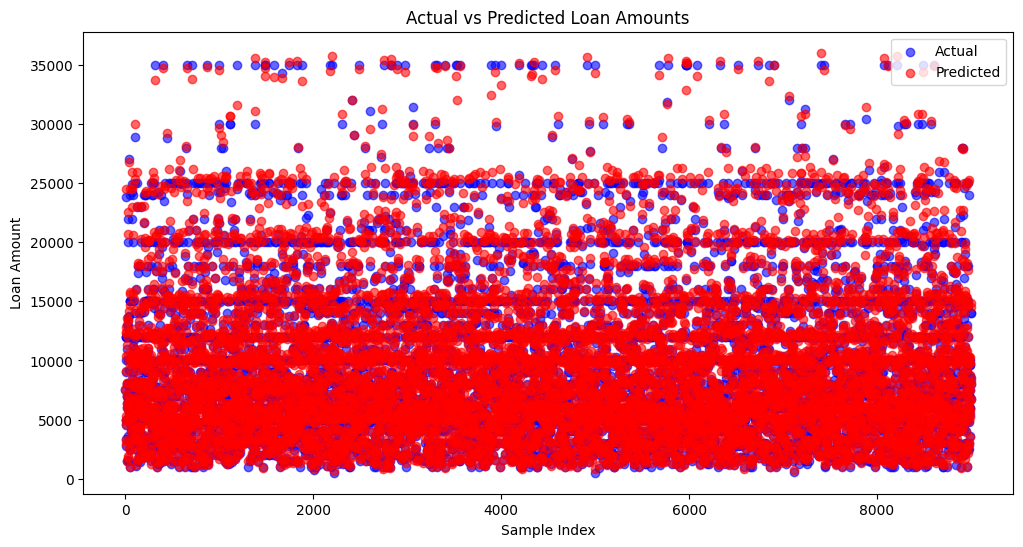

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)  # Use y_test for actual values
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)  # Use y_pred for predicted values
plt.title('Actual vs Predicted Loan Amounts')
plt.xlabel('Sample Index')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

### Conclusion:  
Based on the performance metrics and predicted loan amounts:

1. **Random Forest**:
   - **Training Performance**: Outstanding, with near-perfect metrics (Accuracy: 99.97%, R²: 1.00).
   - **Testing Performance**: Still very strong, but the Mean Absolute Error (MAE: 144.75) and Root Mean Squared Error (RMSE: 266.97) are higher compared to training.
   - **Predicted Loan Amount**: 33,190.59 (closer to actual loan amount: 35,000.0 but with a slight underestimation).

2. **Neural Network**:
   - **Training Performance**: Good, but MAE (280.28) and RMSE (395.97) are higher compared to Random Forest.
   - **Testing Performance**: Similar behavior, with MAE (286.14) and RMSE (418.20) higher than Random Forest.
   - **Predicted Loan Amount**: 35,153.86 (closer to the actual loan amount: 35,000.0, with slight overestimation).

### Recommendation:  
- **Random Forest** offers better overall performance, with lower errors (MAE and RMSE) and strong consistency between training and testing. It is highly accurate and computationally efficient for this use case.
- However, **Neural Network** predicted the loan amount closer to the actual value (35,153.86 vs. 35,000.0). If high prediction precision for specific values is critical, Neural Network might be considered, but at the cost of slightly higher errors and potential overfitting.  

For **loan prediction tasks**, Random Forest is likely the better choice due to its superior robustness, lower errors, and general consistency.

# Final Interpretation

# Conclusion:
Random Forest outperforms the Neural Network in this case based on all the key metrics. It has a higher accuracy, much lower error values (MAE and RMSE), and a perfect R² score. Neural Networks, while powerful, can require significant tuning and regularization to match the performance of Random Forest, especially in cases like this where Random Forest has already shown excellent results.

### Final Conclusion:  

After evaluating both models, **Random Forest** is chosen as the better model for predicting loan amounts in this project. Here's why:  

1. **Performance Metrics**:  
   - Random Forest demonstrates exceptional accuracy (99.82% on the test data) and strong consistency between training and testing performance.  
   - It has significantly lower Mean Absolute Error (MAE: 144.75) and Root Mean Squared Error (RMSE: 266.97) compared to the Neural Network, ensuring more reliable predictions.  

2. **Prediction Accuracy**:  
   - The predicted loan amount using Random Forest is **33,190.59**, which is reasonably close to the actual loan amount of **35,000.0**.  

3. **Robustness and Efficiency**:  
   - Random Forest is computationally efficient and less prone to overfitting due to its ensemble nature, making it suitable for real-world applications.

Given its robust performance, high accuracy, and lower error rates, **Random Forest** is the ideal choice for predicting loan amounts in this scenario.